# 读取数据库数据

## 导包

In [1]:
import pandas as pd
import pymysql

## 连接数据库

In [2]:
conn = pymysql.connect(host="localhost",user="zouzh",password="zouzihan0706",db="class",port=3306)

### sql语句

In [3]:
sqlcmd = "select content from cucnews"

### 读取数据并(写入.txt)存入对象

In [4]:
# 存入.txt

cur = conn.cursor()
cur.execute(sqlcmd)
dbcontent = cur.fetchall()
f = open("output\dbcontent.txt","w",encoding="utf-8")
f.write(str(dbcontent))
f.close()
conn.close()

# 分词并统计词频

## 导包

In [5]:
import jieba

## 读取数据文本

In [6]:
with open("output\dbcontent.txt","r",encoding="utf-8") as f:
    ct = f.read()

## 加载自定义词库

In [7]:
jieba.load_userdict('AIDict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\36942\AppData\Local\Temp\jieba.cache
Loading model cost 0.950 seconds.
Prefix dict has been built successfully.


## 分词

In [8]:
seg_list = jieba.cut(ct,cut_all=False)

## 词频统计

In [9]:
tf = {}
for seg in seg_list:
    if seg in tf:
        tf[seg] += 1
    else:
        tf[seg] = 1

## 出现的词

In [10]:
ci = list(tf.keys())

## 加载休止词

In [11]:
with open('stopword.txt','r',encoding='utf-8') as ft:
    stopword = ft.read()

## 筛选词语

In [12]:
for seg in ci:
    if tf[seg]<5 or len(seg)<2 or seg in stopword:
        tf.pop(seg)
# print(tf)

## 绘制词云图

### 导包

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 绘图

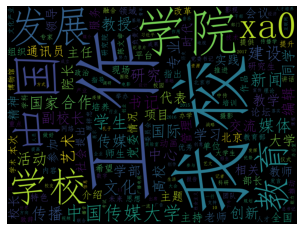

In [14]:
font = r'C:\Windows\Fonts\simfang.ttf'
wc = WordCloud(font_path=font,width=800,height=600).generate_from_frequencies(tf)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('output\cucnewsI.jpg')

### 套图

In [15]:
from PIL import Image
import numpy as np

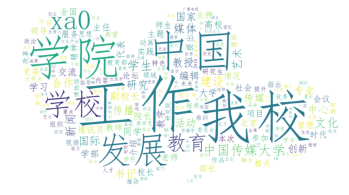

In [16]:
mask = np.array(Image.open("pictures\heart.png"))
wc = WordCloud(background_color="white",mask=mask,font_path=font,width=800,height=600).generate_from_frequencies(tf)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('output\cucnewsII.jpg')

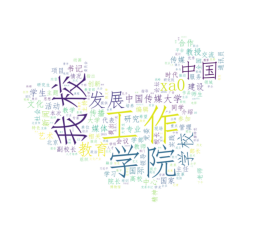

In [17]:
mask = np.array(Image.open("pictures\china.jpg"))
wc = WordCloud(background_color="white",mask=mask,font_path=font,width=800,height=600).generate_from_frequencies(tf)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('output\cucnewsIII.jpg')

### 从原图提取色彩绘图

In [18]:
from wordcloud import ImageColorGenerator

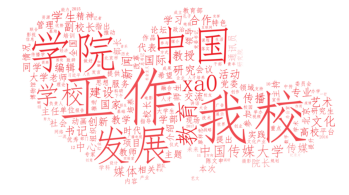

In [19]:
mask = np.array(Image.open("pictures\heart.png"))
wc = WordCloud(background_color="white",mask=mask,font_path=font,width=800,height=600).generate_from_frequencies(tf)
image_colors = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.show()
wc.to_file('output\cucnewsIV.jpg')

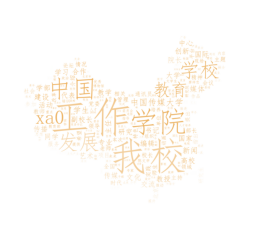

In [20]:
mask = np.array(Image.open("pictures\china.jpg"))
wc = WordCloud(background_color="white",mask=mask,font_path=font,width=800,height=600).generate_from_frequencies(tf)
image_colors = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.show()
wc.to_file('output\cucnewsV.jpg')